**import Libraries**

In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import sklearn
from sklearn.decomposition import TruncatedSVD

**Data Visualization**

In [157]:
test = pd.read_csv('../input/recommend/Test Data.csv')
train = pd.read_csv('../input/recommend/Training Data.csv')
sub= pd.read_csv('../input/recommend/Training Data Target.csv')

In [158]:
train=train.dropna()
train.head()


,user_id,aov,category
0,37327,29128.0,Phones
1,37327,354.0,Fashion
2,37327,460.0,Home Decor
3,37327,761.0,Fashion
4,41260,16658.0,Phones


In [159]:
test= test.dropna()
test.head()

,Unnamed: 0,user_id,aov,category
0,0,43323,19115.0,Phones
1,1,43323,29309.0,Phones
2,2,43323,15293.0,Phones
3,3,43323,23548.0,Phones
4,4,43323,751.0,Fashion


In [160]:
sub= sub.dropna()
sub.head()

,user_id,aov,category
0,13153,-9999,Phones
1,42853,-9999,Phones
2,30550,-9999,Phones
3,9797,-9999,Phones
4,8171,-9999,Phones


In [161]:
train.shape

(257407, 3)

In [162]:
test.shape

(172554, 4)

In [163]:
sub.shape

(13245, 3)

In [164]:
people=pd.DataFrame(train.groupby('category')['user_id'].count ())
recommend= people.sort_values('user_id', ascending=False)
recommend.head(10)

,user_id
category,
Phones,66341
Fashion,60327
Home Decor,29703
Toys,21106
Groceries,12810
Back to School,12566
Gaming,11937
Consumer Durables,11731
Books,6010


<AxesSubplot:xlabel='category'>

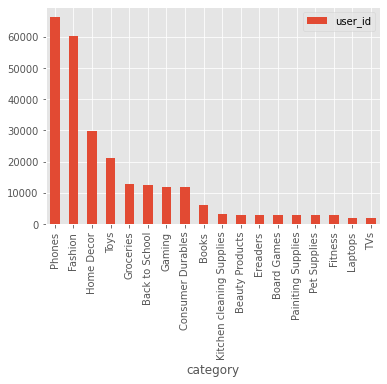

In [165]:
recommend.head(30).plot(kind="bar")

analysis:
* the above graph gives us the most popular products sold by the business (arranged in descending orders).

**model-based collaborative filtering system**

In [166]:
recommend1 = sub.head(10000)

In [167]:
utility_matrix= recommend1.pivot_table(values='aov',index='user_id', columns='category', fill_value=0)
utility_matrix.head()

category,Back to School,Consumer Durables,Ereaders,Fashion,Fitness,Gaming,Groceries,Home Decor,Laptops,Pet Supplies,Phones,TVs,Toys
user_id,,,,,,,,,,,,,
1,0,0,0,-9999,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,-9999,0,0
14,0,0,0,0,0,0,0,0,0,0,-9999,0,0
16,0,0,0,0,0,0,0,0,0,0,-9999,0,0
19,0,0,0,0,0,0,0,0,0,0,-9999,0,0


In [168]:
utility_matrix.shape

(10000, 13)

Transposing the matrix

In [169]:
x= utility_matrix.T
x.head()

user_id,1,6,14,16,19,26,27,28,30,33,...,49973,49985,49988,49992,49993,49999,50030,50066,50075,50079
category,,,,,,,,,,,,,,,,,,,,,
Back to School,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Consumer Durables,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ereaders,0,0,0,0,0,0,0,0,0,0,...,0,0,-9999,0,0,0,0,0,0,0
Fashion,-9999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Fitness,0,0,0,0,0,0,-9999,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [170]:
x.shape

(13, 10000)

unique products in subset of data

In [171]:
x1 = x

**Decomposing the Matrix**

In [172]:
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(x)
decomposed_matrix.shape

(13, 10)

**correlation matrix**

In [173]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(13, 13)

**isolating Groceries from correlation matrix**

assuming the customer buy groceries(randomly chosen)

In [174]:
x.index[9]

'Pet Supplies'

In [175]:
i = "Pet Supplies"

product_names = list(x.index)
category = product_names.index(i)
category

9

Correlation for all items with the item purchased by this customer based on items rated by other customers people who bought the same product

In [176]:
correlation_product_ID = correlation_matrix[category]
correlation_product_ID.shape

(13,)

**Recommending top 10 highly correlated products in sequence**

In [177]:
Recommend = list(x.index[correlation_product_ID > 3])

# Removes the item already bought by the customer
#Recommend.remove(i) 

Recommend[0:2]

[]